In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML
from matplotlib import animation
from random import randint
from scipy.linalg import null_space

In [2]:
L=5
mu=2
n = 100
# 3,0.3

S = np.diag([np.sqrt(L),np.sqrt(mu)])
t=-1
P = np.array([[np.cos(t),-np.sin(t)],[np.sin(t),np.cos(t)]])


Z = np.random.normal(size=(n,2))
A = Z @ P @ S @ P.T
ker = null_space(A.T)
M = A.T @ A / n
x = np.array([1,1])
y = np.linalg.pinv(A).T @ A.T @ A @ x + 2* ker @ np.random.normal(size=(n-2))
v,w = np.linalg.eigh(M)

b = - A.T @ y / n
c = np.sum(np.square(y))/(2*n)
print(f'The eigenvalues of M are {v[0]} and {v[1]}.')

def f(x):
    return 0.5 * x.T @ M @ x + b.T @ x + c

The eigenvalues of M are 2.236820343597378 and 5.685899763098771.


$$\Large
A \in \mathbb{R}^{n \times 2}, \qquad y \in \mathbb{R}^{n}.
$$

$$
$$

$$\Large
f(x) = \frac{1}{2n} \| A x - y \|^2 
= \frac{1}{2} x^T M x + \langle x,b \rangle + c.
$$

$$
$$
where

$$\Large
M = \frac{1}{n} A^T A, \qquad b = - \frac{1}{n} A^T y, \qquad c = \frac{1}{n} \|y\|^2.
$$

In [3]:
x1=np.arange(-2,4, 0.005)
X1, X2 = np.meshgrid(x1, x1)
Z = 0.5 * M[0,0]*X1*X1 + 0.5*M[1,1]*X2*X2 + M[0,1]*X1*X2 + b[0]*X1 + b[1]*X2 + c

In [4]:
class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s
    
# Label levels with specially formatted floats
if plt.rcParams["text.usetex"]:
    fmt = r'%r'
else:
    fmt = '%r'

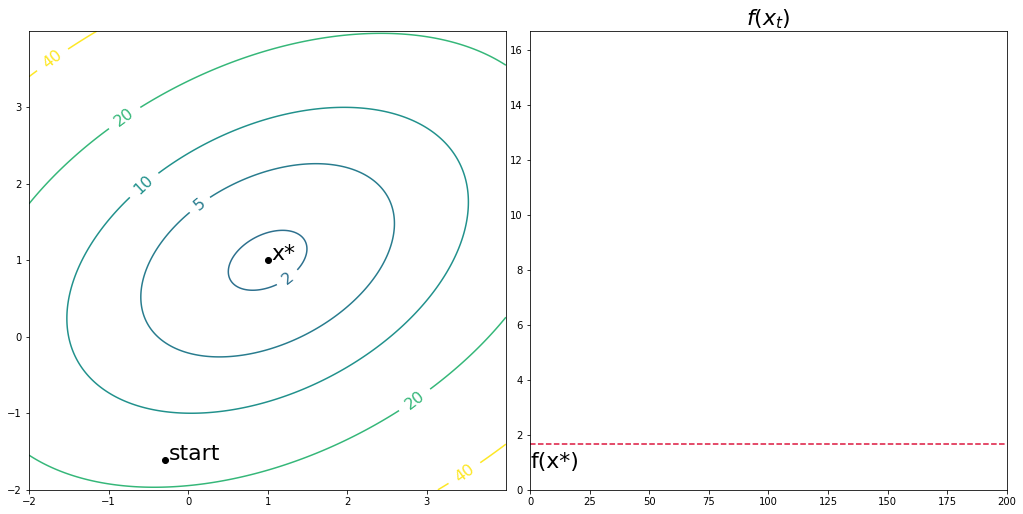

In [5]:
fig=plt.figure(figsize=(14,7))
N=200

ax = plt.subplot(1,2,1) 
levels = np.array([-20,-10,-5,-1,2,5,10,20,40])
levels = np.sort(levels)
CS=plt.contour(X1,X2,Z,levels)

plt.scatter(x[0],x[1], color='black')
plt.annotate('x*',(x[0]+0.05,x[1]),fontsize=22, color='black')

start = x + 1.5* P[:,0] + -2.5* P[:,1]

plt.scatter(start[0],start[1], color='black')
point, = ax.plot([],[],marker='o',color='crimson',linewidth=2)
plt.annotate('start',(start[0]+0.05,start[1]),fontsize=22, color='black')

txt_title = ax.set_title('', fontsize=22)

# Recast levels to new class
CS.levels = [nf(val) for val in CS.levels]
plt.clabel(CS, CS.levels, inline=True, fmt=fmt, fontsize=16)

ax2 = plt.subplot(1,2,2)

error_line, = ax2.plot([],[],marker='o',color='navy')
plt.hlines(f(x),0,N, color='crimson', linestyle='--')
ax2.set_title(r'$f(x_t)$', fontsize=22)
plt.annotate('f(x*)',(0.1,0.8),fontsize=22)

ax2.set_xlim(-0.2,N)
ax2.set_ylim(0,1.05*f(start))

fig.subplots_adjust(left=0.02, bottom=0.04, right=0.99, top=0.95, wspace=0.05, hspace=None)


$$\Large
f(x) = \frac{1}{2n} \| A x - y \|^2 
= \frac{1}{2n} \sum_{i=1}^n (\langle x,a_i \rangle - y_i )^2
= \frac{1}{n}\sum_{i=1}^n f_i(x),
$$
where
$$\Large
f_i(x) = \frac{1}{2} (\langle x,a_i \rangle - y_i )^2.
$$
We have
$$\Large
\nabla f_i(x) = (\langle x,a_i \rangle - y_i ) a_i.
$$



In [6]:
def stochastic_gradient(x):
    i = randint(0,n-1)
    
    return (x.T @ A[i,:] - y[i])* A[i,:]

In [40]:
# GRADIENT DESCENT

time = np.array(range(N))
position = np.copy(start)
trajectory = np.zeros(shape=(2,N))
error = np.zeros(N)
alpha = 0.05


for t in range(N):
    trajectory[:,t] = position
    error[t] = f(position)
    position = position - alpha * stochastic_gradient(position)

In [41]:
def drawframe(k):
    point.set_data(trajectory[0,:k+1],trajectory[1,:k+1])
    error_line.set_data(time[:k+1], error[:k+1])
    txt_title.set_text(f'Iteration {k}')
    return point, error_line

In [42]:
anim = animation.FuncAnimation(fig, drawframe, frames=N, interval=100, blit=True)
HTML(anim.to_html5_video())

In [120]:
# SGD WITH MOMENTUM

time = np.array(range(N))
position = np.copy(start)
trajectory = np.zeros(shape=(2,N))
error = np.zeros(N)

v = np.zeros(2)


alpha = 0.1
beta =0.4


for i in range(N):
    trajectory[:,i] = position
    error[i] = f(position)
    
    v = - alpha * stochastic_gradient(position) + beta * v
    
    position = position + v
    

In [122]:
anim = animation.FuncAnimation(fig, drawframe, frames=N, interval=100, blit=True)
HTML(anim.to_html5_video())